## Time Series Forecasting Using SARIMAX and LSTM.ipynb

In [1]:
# Importing Python Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Importing Plotly for visualizaing bigger Time Series
import plotly_express as px

In [3]:
pd.set_option('display.max_rows',100)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
plt.rcParams['figure.figsize'] = (10,6)

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
# Importing Microsoft Stock Data
df_Microsoft = pd.read_csv('Datasets/Microsoft_Stock.csv')

In [11]:
df_Microsoft.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Best Arima Model

- To reach upto the maximum potential of the Arima Model

In [14]:
#To define the differencing order of the series

def find_diff(Series):
    results = adfuller(Series)
    p = results[1]
    d = 0
    while (p > 0.05):
        Series = Series.diff().dropna()
        results = adfuller(Series)
        p = results[1]
        d = d + 1
        
    print('P - value: ', p)
    print('Differencing Order: ', d)
        

In [15]:
#We need to determine p and q values too for that checking pacf (p) and acf (q) is necessary

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

def Corr_Plot(Series):
    
    print('Partial Autocorrelation and Autocorrelation Plot')
    a = plot_pacf(Series)
    
    b = plot_acf(Series)

In [16]:
# Writing a function for ARIMA model

def ARIMA_run(Series, p, d ,q, n, Y_test):
    model = ARIMA(Series, order = (p,d,q))
    res = model.fit()
    res.plot_diagnostics()
    # print(res.summary())
    Y_pred = res.forecast(n)
    # print('--------------------------------------------------')
    print('Root mean Squared error :', mean_squared_error(Y_test, Y_pred, squared=False))
    return res, Y_pred
    

In [17]:
# To plot train, test and predicted values

def plot3(Y1, Y2, Y3):
    plt.plot(Y1, label = 'Train')
    plt.plot(Y2,  label ='Test')
    plt.plot(Y3, label = 'Prediction')
    plt.xticks(rotation = 45)
    plt.legend()

## SARIMAX

For handling Seasonal Data

In [18]:
# Importing SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [19]:
def SARIMA_run(series, p,d,q, n, P, D, Q, S, Y_test):
    sarima = SARIMAX(series, order =(p,d,q), seasonal_order = (P, D, Q, S),)
    res = sarima.fit()
    res.plot_diagnostics()
    # print(res.summary())
    Y_pred = res.forecast(n)
    # print('--------------------------------------------------')
    print('Root mean Squared error :', mean_squared_error(Y_test, Y_pred, squared=False))
    return res, Y_pred
    

Partial Autocorrelation and Autocorrelation Plot


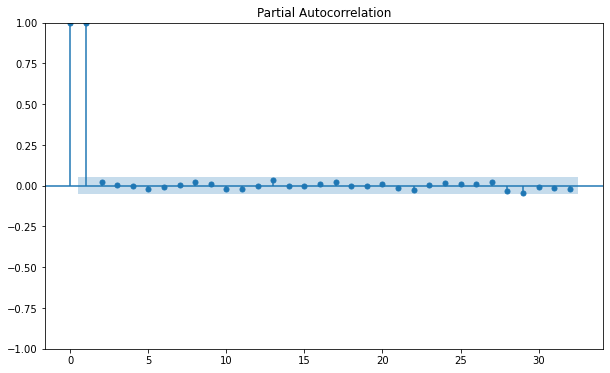

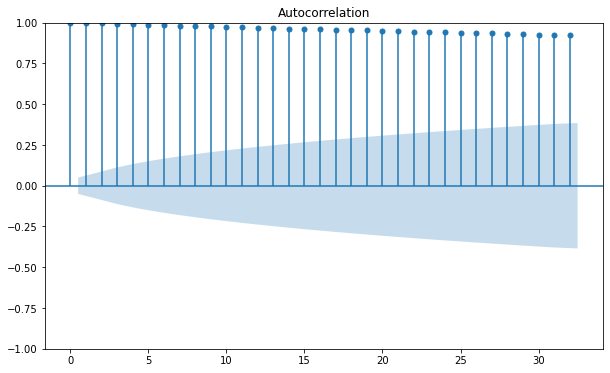

In [20]:
Corr_Plot(df_Microsoft['High'])

In [21]:
# For Finding the Differencing Order
find_diff(df_Microsoft['High'])

P - value:  2.171528420200645e-17
Differencing Order:  1


In [22]:
df_Microsoft.head(60)

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
5,4/9/2015 16:00:00,41.25,41.62,41.25,41.48,25723861
6,4/10/2015 16:00:00,41.63,41.95,41.41,41.72,28022002
7,4/13/2015 16:00:00,41.40,42.06,41.39,41.76,30276692
8,4/14/2015 16:00:00,41.80,42.03,41.39,41.65,24244382
9,4/15/2015 16:00:00,41.76,42.46,41.68,42.26,27343581


In [23]:
df_Microsoft.shape

(1511, 6)

In [24]:
df_Microsoft.set_index(df_Microsoft['Date'], inplace=True)

In [25]:
px.line(df_Microsoft['High'])

In [26]:
Train_Microsoft = df_Microsoft['High'][:1000]

In [28]:
Test_Microsoft = df_Microsoft['High'][1000:]

In [29]:
Test_Microsoft.shape

(511,)

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.98197D+00    |proj g|=  4.58648D+01

At iterate    5    f=  3.59856D+00    |proj g|=  3.06318D+00

At iterate   10    f=  2.24632D+00    |proj g|=  5.90931D-01

At iterate   15    f=  2.03507D+00    |proj g|=  5.44244D-02

At iterate   20    f=  2.01962D+00    |proj g|=  1.05498D-02

At iterate   25    f=  2.01708D+00    |proj g|=  9.21068D-03

At iterate   30    f=  2.01644D+00    |proj g|=  4.39054D-03

At iterate   35    f=  2.01641D+00    |proj g|=  8.06090D-04

At iterate   40    f=  2.01641D+00    |proj g|=  4.99293D-03

At iterate   45    f=  2.01599D+00    |proj g|=  8.10827D-03


/opt/anaconda3/envs/tf/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  2.01574D+00    |proj g|=  1.07348D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     59      1     0     0   1.073D-02   2.016D+00
  F =   2.0157365226281763     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/anaconda3/envs/tf/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



Root mean Squared error : 96.47837151941668


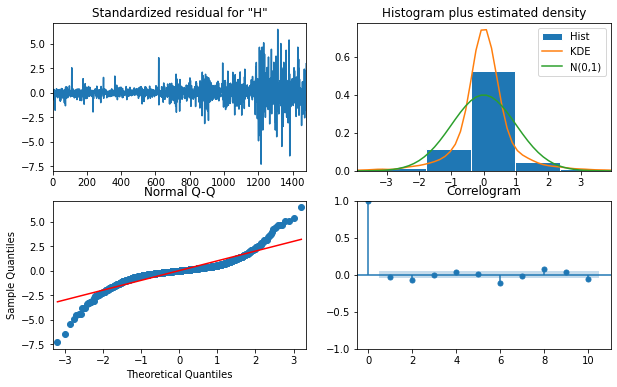

In [51]:
# Training a SARIMAX model
model_sarima, Y_pred = SARIMA_run(df_Microsoft['High'],2,1,2,511,2,1,2,30, Test_Microsoft)

In [54]:
mean_squared_error(Test_Microsoft, Y_pred, squared=False)

96.47837151941668

In [56]:
Y_pred = pd.DataFrame(Y_pred)

In [58]:
Y_pred.set_index(Test_Microsoft.index, inplace=True)

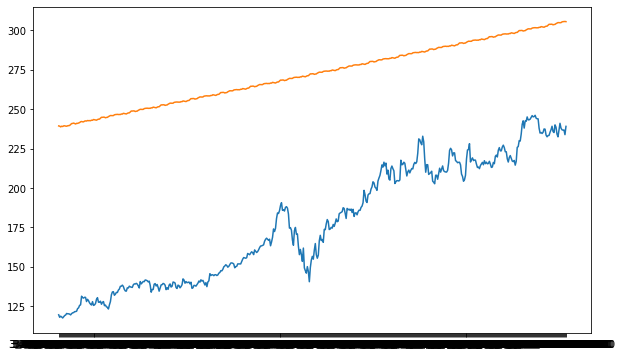

In [59]:
plt.plot(Test_Microsoft)
plt.plot(Y_pred)

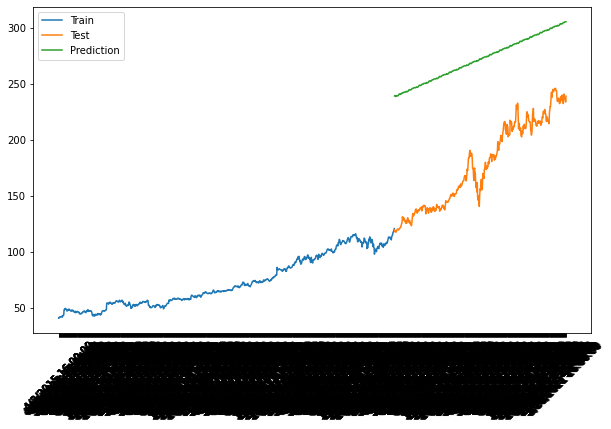

In [62]:
plot3(Train_Microsoft, Test_Microsoft, Y_pred)

## Observation - SARIMAX

We can see that SARIMAX is also not working well with this type of data.

## Let's Try to build LSTM Models now

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [31]:
# For transforming the series into the shape which LSTM can accept
def LSTM_Seq(df, length):
        X = []
        Y = []
        for i in range(len(df)-length):
            X.append(df[i:i+length])
            Y.append(df.iloc[i + length])
        return np.array(X), np.array(Y)

In [32]:
np.__version__

'1.19.5'

In [33]:
# For Creating train and test dataset for LSTM
def LSTM_process(df, t_size, window):
    Xtrain = df[:int(len(df)*t_size)]
    Xtest  = df[int(len(df)*t_size):]
    # print(len(df))
    Xtrain
    
    
    X_train, Y_train = LSTM_Seq(Xtrain, window)
    X_test, Y_test = LSTM_Seq(Xtest, window)
    X_train
    
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    
    return X_train, Y_train, X_test, Y_test
    
    

In [34]:
from tensorflow.keras.layers import *

In [35]:
# For training the LSTM model
def LSTM_run2(X_train, Y_train, epochs):
    model1 = Sequential()
    model1.add(InputLayer((X_train.shape[1], Y_train.shape[1])))
    model1.add(LSTM(64))
    model1.add(Dense(8, 'relu'))
    model1.add(Dense(1, 'linear'))

    model1.summary()
    cp = ModelCheckpoint('model1/', save_best_only=True)
    model1.compile(loss='mean_squared_error', optimizer = 'adam')
    
    model = model1.fit(X_train, Y_train, epochs=epochs, batch_size=1, verbose=2)
    plt.plot(model.history['loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()
    
    
    return model1

In [36]:
# For Plotting the predicted data by LSTM and for checking the scores 
def LSTM_predict(X_test,Y_test, model1):
    Y_pred_lstm = model1.predict(X_test).flatten()
    print('RMSE :', mean_squared_error(Y_test, Y_pred_lstm,  squared=False))
    plt.plot(Y_pred_lstm,  label='Predicted')
    plt.plot(Y_test, label = 'Real Data')
    plt.legend()
    
    

In [37]:
from tensorflow.keras.models import load_model

In [38]:
df_Microsoft.head(60)

,Date,Open,High,Low,Close,Volume
Date,,,,,,
4/1/2015 16:00:00,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
4/2/2015 16:00:00,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
4/6/2015 16:00:00,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
4/7/2015 16:00:00,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4/8/2015 16:00:00,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
4/9/2015 16:00:00,4/9/2015 16:00:00,41.25,41.62,41.25,41.48,25723861
4/10/2015 16:00:00,4/10/2015 16:00:00,41.63,41.95,41.41,41.72,28022002
4/13/2015 16:00:00,4/13/2015 16:00:00,41.40,42.06,41.39,41.76,30276692
4/14/2015 16:00:00,4/14/2015 16:00:00,41.80,42.03,41.39,41.65,24244382


In [39]:
px.line(df_Microsoft['High'])

In [40]:
X_train, Y_train, X_test, Y_test = LSTM_process(pd.DataFrame(df_Microsoft['High'][:500]), .7, 5)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________
Train on 345 samples
Epoch 1/20


2024-12-04 08:57:19.639832: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference___backward_standard_lstm_19887_20356_specialized_for_StatefulPartitionedCall_at___inference_distributed_function_20450' and '__inference___backward_standard_lstm_19887_20356' both implement 'lstm_e3777c64-e3c8-47fb-8677-0bc598e74d52' but their signatures do not match.


345/345 - 4s - loss: 840.4122
Epoch 2/20
345/345 - 3s - loss: 19.1517
Epoch 3/20
345/345 - 3s - loss: 12.2729
Epoch 4/20
345/345 - 3s - loss: 2.8020
Epoch 5/20
345/345 - 3s - loss: 1.5450
Epoch 6/20
345/345 - 3s - loss: 1.2575
Epoch 7/20
345/345 - 3s - loss: 1.3106
Epoch 8/20
345/345 - 3s - loss: 1.1029
Epoch 9/20
345/345 - 3s - loss: 1.0887
Epoch 10/20
345/345 - 3s - loss: 1.0306
Epoch 11/20
345/345 - 3s - loss: 1.0095
Epoch 12/20
345/345 - 3s - loss: 1.0396
Epoch 13/20
345/345 - 3s - loss: 0.9267
Epoch 14/20
345/345 - 3s - loss: 0.9384
Epoch 15/20
345/345 - 3s - loss: 0.9639
Epoch 16/20
345/345 - 3s - loss: 0.9450
Epoch 17/20
345/345 - 3s - loss: 0.9636
Epoch 18/20
345/345 - 3s - loss: 0.9452
Epoch 19/20
345/345 - 3s - loss: 0.8922
Epoch 20/20
345/345 - 3s - loss: 0.8268


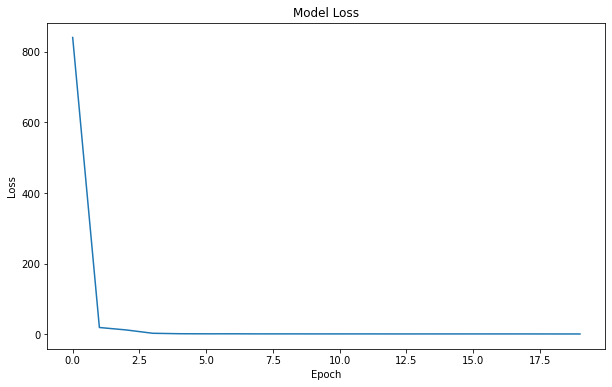

In [48]:
model_stock = LSTM_run2(X_train, Y_train, 20)

2024-12-04 08:58:17.578502: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_standard_lstm_34485' and '__inference_standard_lstm_34485_specialized_for_sequential_1_lstm_1_StatefulPartitionedCall_at___inference_distributed_function_34794' both implement 'lstm_8e34dba1-8aca-4972-88bf-c909125931f4' but their signatures do not match.


RMSE : 2.728180067563682


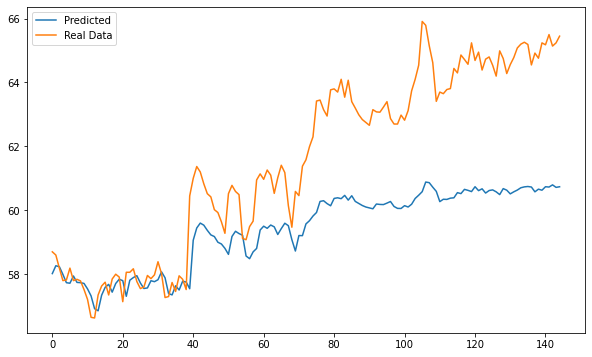

In [49]:
LSTM_predict(X_test, Y_test, model_stock)

RMSE : 0.8041807637670557


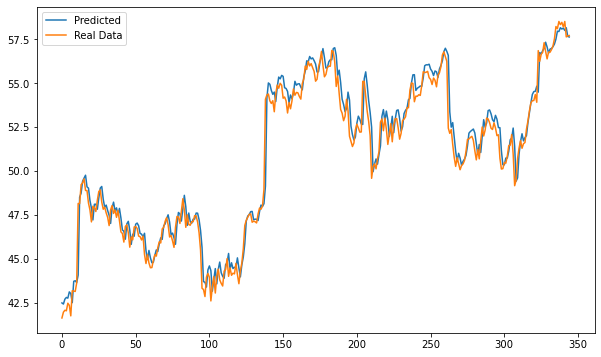

In [50]:
LSTM_predict(X_train, Y_train, model_stock)

## Observation - LSTM

- We can see how drastically score got changed when we reduce the length of Train Data Time Steps Sequence to 5, when the sequence length was large like 20, 30, 60 it was going completely off balance but why

- when taken smaller length of sequence it is working perfectly and for longer sequence it is not

- May be due to quick changes in the data can only be learn when sequence length is small, so it 

- depends on the speed with data changes and so if series doesn't have sudden changes then longer sequence can be used other wise try reducing sequence length and see if starts predicting or not

- In this way we can predict any Time series sequence which is not influenced much by any external factors first by adjusting the sequence length and then also if we are not getting the satisfactory results we can try to add more layers and units in individual layers

- Also try to learn more about the basics of Deep learning, layers, individual cells and mathematics behind it.

In [67]:
# Let's try other datasets too
df_electric = pd.read_csv('Datasets/Electric_Production.csv')

In [68]:
df_electric.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [74]:
df_electric.rename(columns = {'IPG2211A2N':'Production'}, inplace=True)

In [77]:
df_electric.head(20)

,DATE,Production
DATE,,
1/1/1985,1/1/1985,72.5052
2/1/1985,2/1/1985,70.6720
3/1/1985,3/1/1985,62.4502
4/1/1985,4/1/1985,57.4714
5/1/1985,5/1/1985,55.3151
6/1/1985,6/1/1985,58.0904
7/1/1985,7/1/1985,62.6202
8/1/1985,8/1/1985,63.2485
9/1/1985,9/1/1985,60.5846


In [71]:
df_electric.set_index(df_electric['DATE'],inplace=True)

In [72]:
df_electric.shape

(397, 2)

In [76]:
px.line(df_electric['Production'])

Partial Autocorrelation and Autocorrelation Plot


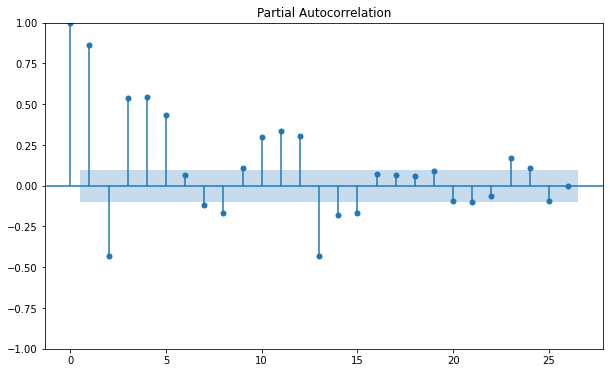

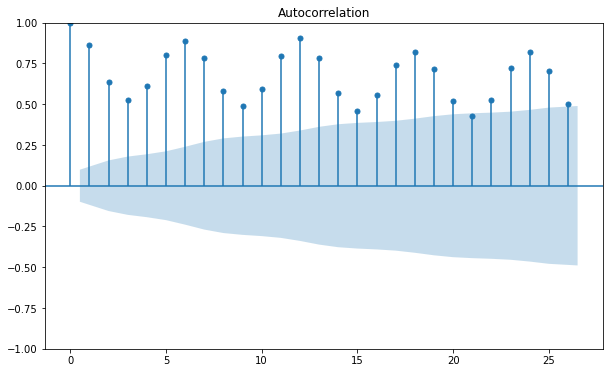

In [78]:
Corr_Plot(df_electric['Production'])

In [79]:
find_diff(df_electric['Production'])

P - value:  4.0777865655388604e-10
Differencing Order:  1


In [80]:
df_electric.shape

(397, 2)

In [81]:
397*.7

277.9

In [82]:
Train_electric = df_electric['Production'][:278]

In [83]:
Test_electric = df_electric['Production'][278:]

In [84]:
Test_electric.shape

(119,)

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.15201D+00    |proj g|=  1.20946D-01

At iterate    5    f=  2.08205D+00    |proj g|=  4.30647D-02

At iterate   10    f=  2.06161D+00    |proj g|=  7.75796D-03

At iterate   15    f=  2.06078D+00    |proj g|=  3.40513D-03

At iterate   20    f=  2.06024D+00    |proj g|=  1.81168D-03

At iterate   25    f=  2.05983D+00    |proj g|=  1.00256D-02

At iterate   30    f=  2.05973D+00    |proj g|=  4.64850D-04

At iterate   35    f=  2.05958D+00    |proj g|=  6.56544D-03

At iterate   40    f=  2.05924D+00    |proj g|=  2.40217D-03

At iterate   45    f=  2.05923D+00    |proj g|=  6.22681D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

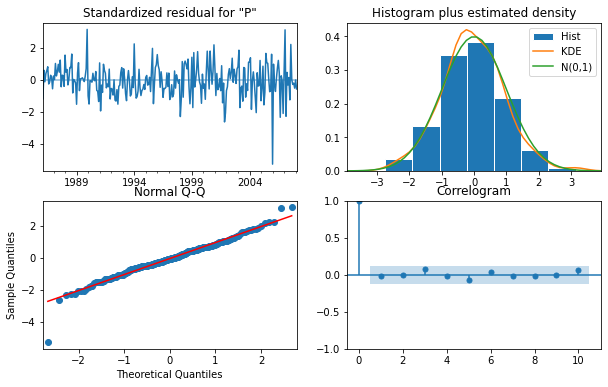

In [85]:
model_electric , Y_pred = SARIMA_run(Train_electric, 2,1,2,119, 2,1,2,12, Test_electric)

In [87]:
def Conv_dataframe(Y_pred, index):
    Y_pred = pd.DataFrame(Y_pred)
    Y_pred.set_index(index, inplace=True)
    return Y_pred

In [88]:
Y_pred = Conv_dataframe(Y_pred, Test_electric.index)

In [89]:
Y_pred

,predicted_mean
DATE,
3/1/2008,101.276442
4/1/2008,92.197311
5/1/2008,93.749116
6/1/2008,102.550471
7/1/2008,110.824729
...,...
9/1/2017,115.872985
10/1/2017,108.164482
11/1/2017,108.961759


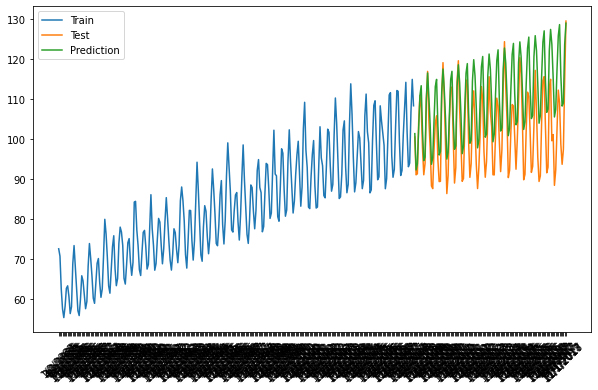

In [90]:
plot3(Train_electric, Test_electric, Y_pred)

## Observation - SARIMAX

SARIMAX predictions is little bit off from the real test data, it is following the pattern of train dataset but in Test dataset trend is little slow from the Train Dataset, so let's check how LSTM works

In [99]:
X_train, Y_train, X_test, Y_test = LSTM_process(pd.DataFrame(df_electric['Production']), .7, 12)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________
Train on 265 samples
Epoch 1/20


2024-12-04 08:26:33.587320: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference___backward_cudnn_lstm_with_fallback_74169_74349' and '__inference___backward_standard_lstm_74453_74922_specialized_for_StatefulPartitionedCall_at___inference_distributed_function_75016' both implement 'lstm_0123f9a9-1709-423e-a193-30ec2bd49715' but their signatures do not match.


265/265 - 6s - loss: 6359.8597
Epoch 2/20
265/265 - 4s - loss: 3420.6116
Epoch 3/20
265/265 - 4s - loss: 1128.6041
Epoch 4/20
265/265 - 4s - loss: 313.5385
Epoch 5/20
265/265 - 4s - loss: 177.7304
Epoch 6/20
265/265 - 4s - loss: 135.7999
Epoch 7/20
265/265 - 4s - loss: 80.5860
Epoch 8/20
265/265 - 4s - loss: 47.5971
Epoch 9/20
265/265 - 4s - loss: 38.1820
Epoch 10/20
265/265 - 4s - loss: 32.2432
Epoch 11/20
265/265 - 4s - loss: 25.8889
Epoch 12/20
265/265 - 4s - loss: 24.4852
Epoch 13/20
265/265 - 4s - loss: 21.5478
Epoch 14/20
265/265 - 4s - loss: 21.6553
Epoch 15/20
265/265 - 4s - loss: 18.0126
Epoch 16/20
265/265 - 4s - loss: 17.2480
Epoch 17/20
265/265 - 4s - loss: 16.7115
Epoch 18/20
265/265 - 4s - loss: 15.4559
Epoch 19/20
265/265 - 4s - loss: 15.0291
Epoch 20/20
265/265 - 4s - loss: 15.0732


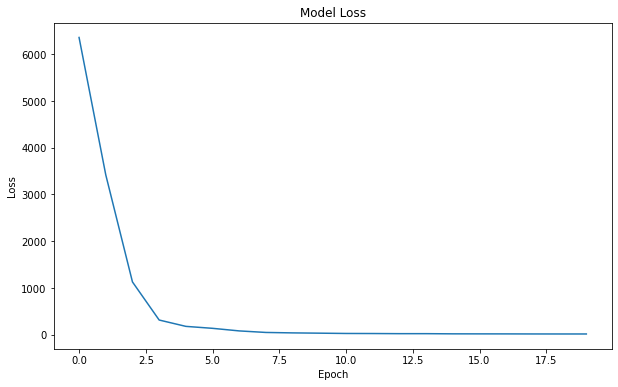

In [100]:
model_electric = LSTM_run2(X_train, Y_train, 20)

2024-12-04 08:28:01.867145: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_standard_lstm_85851_specialized_for_sequential_3_lstm_3_StatefulPartitionedCall_at___inference_distributed_function_86160' and '__inference_standard_lstm_85851' both implement 'lstm_786e0c94-d2d0-4f70-a1ce-393caf63e6a9' but their signatures do not match.


RMSE : 5.852508551886683


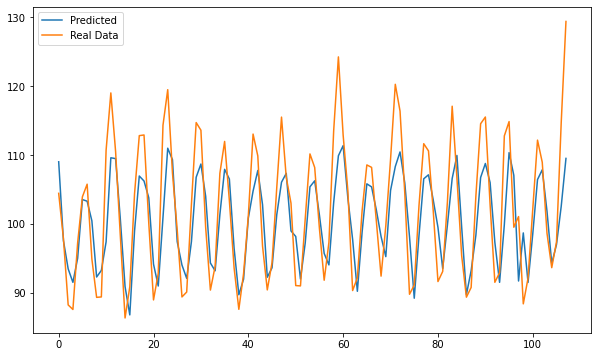

In [101]:
LSTM_predict(X_test, Y_test, model_electric)

RMSE : 3.460472130814015


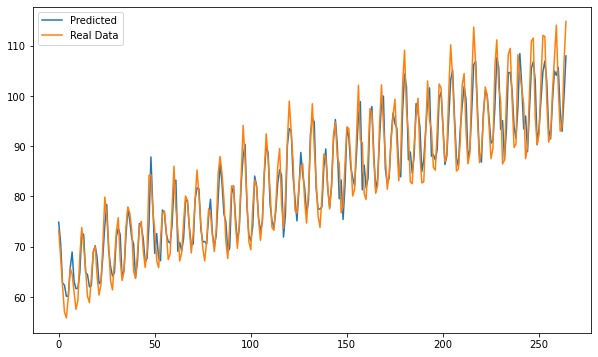

In [102]:
LSTM_predict(X_train, Y_train, model_electric)

In [114]:
a = []

In [115]:
a.append(X_test[1])

In [117]:
a = np.array(a)

In [118]:
a.shape

(1, 12, 1)

In [119]:
model_electric.predict(a)

array([[97.545784]], dtype=float32)

## Observation - LSTM

- As we can see above that model is forecasting correctly when we take length of 12 time stamps in Training Dataset, it catches the pattern correctly

- LSTM leans past data and after 12 time stamps there is seasonality, so it learns the pattern.

- But when we took a longer sequence of 20 stamps it got completely lost which means sometimes longer sequence of time steps will not help in learning the pattern

- One more insight I am getting that number of different patterns a model has to learn, the more number of cells and more number of layers it's required

In [41]:
# Let's try one more dataset for Forecasting Using LSTM model
df_Dclimate = pd.read_csv('Datasets/DailyDelhiClimateTrain.csv')

In [50]:
df_Dclimate.head(40)

,date,meantemp,humidity,wind_speed,meanpressure
date,,,,,
2013-01-01,2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,2013-01-05,6.000000,86.833333,3.700000,1016.500000
2013-01-06,2013-01-06,7.000000,82.800000,1.480000,1018.000000
2013-01-07,2013-01-07,7.000000,78.600000,6.300000,1020.000000
2013-01-08,2013-01-08,8.857143,63.714286,7.142857,1018.714286
2013-01-09,2013-01-09,14.000000,51.250000,12.500000,1017.000000


In [46]:
df_Dclimate.set_index(df_Dclimate['date'], inplace = True)

In [49]:
px.line(df_Dclimate['meantemp'])

In [52]:
df_Dclimate.shape

(1462, 5)

In [53]:
X_train, Y_train, X_test, Y_test = LSTM_process(pd.DataFrame(df_Dclimate['meantemp']), .6, 12)

2024-12-05 18:18:32.713870: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-05 18:18:32.716305: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dense (Dense)                (None, 8)                 520       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________
Train on 865 samples
Epoch 1/20


2024-12-05 18:18:34.093946: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference___backward_cudnn_lstm_with_fallback_2273_2453' and '__inference___backward_standard_lstm_2557_3026_specialized_for_StatefulPartitionedCall_at___inference_distributed_function_3120' both implement 'lstm_de57d14f-0d78-4dbe-96f6-7e38115ccfc1' but their signatures do not match.


865/865 - 14s - loss: 75.5306
Epoch 2/20
865/865 - 12s - loss: 3.8359
Epoch 3/20
865/865 - 12s - loss: 3.2123
Epoch 4/20
865/865 - 12s - loss: 3.3096
Epoch 5/20
865/865 - 12s - loss: 3.2110
Epoch 6/20
865/865 - 12s - loss: 3.2046
Epoch 7/20
865/865 - 12s - loss: 3.1072
Epoch 8/20
865/865 - 12s - loss: 3.0452
Epoch 9/20
865/865 - 12s - loss: 3.0809
Epoch 10/20
865/865 - 12s - loss: 3.1206
Epoch 11/20
865/865 - 12s - loss: 3.0781
Epoch 12/20
865/865 - 13s - loss: 3.0015
Epoch 13/20
865/865 - 13s - loss: 2.9805
Epoch 14/20
865/865 - 13s - loss: 2.9796
Epoch 15/20
865/865 - 13s - loss: 2.9285
Epoch 16/20
865/865 - 13s - loss: 3.0962
Epoch 17/20
865/865 - 13s - loss: 2.9338
Epoch 18/20
865/865 - 13s - loss: 2.9163
Epoch 19/20
865/865 - 13s - loss: 2.9065
Epoch 20/20
865/865 - 13s - loss: 2.8579


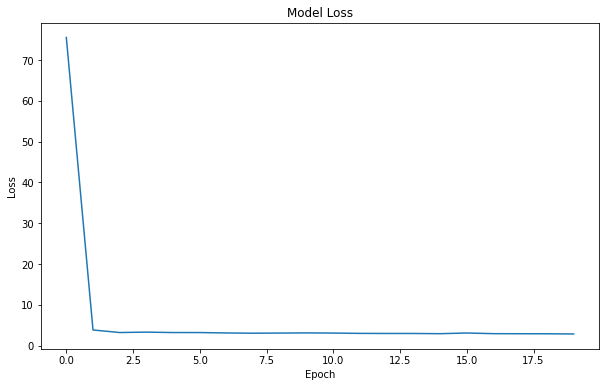

In [54]:
model_climate = LSTM_run2(X_train, Y_train, 20)

2024-12-05 18:25:22.994741: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_standard_lstm_37955_specialized_for_sequential_lstm_StatefulPartitionedCall_at___inference_distributed_function_38264' and '__inference_cudnn_lstm_with_fallback_38066' both implement 'lstm_b0c229e3-98e0-4b43-b62b-4387b89193e4' but their signatures do not match.


RMSE : 1.6072846397461218


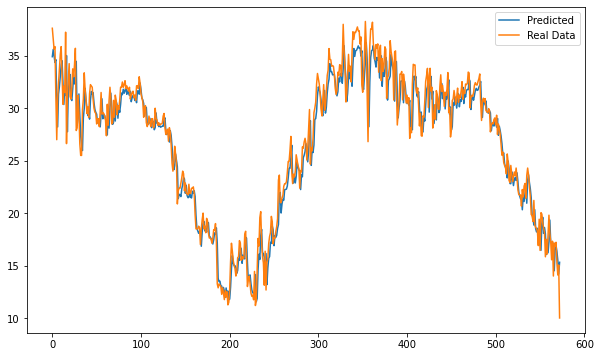

In [55]:
LSTM_predict(X_test, Y_test, model_climate)

RMSE : 1.6230067246584061


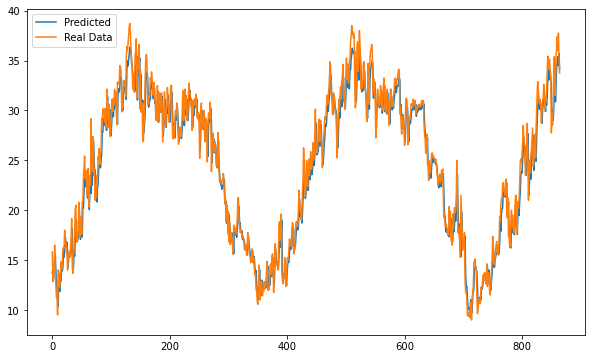

In [56]:
LSTM_predict(X_train, Y_train, model_climate)

## Observation - LSTM

- We can see that our LSTM model predicts very accurately with a RMSE of 1.62


## To Do Next 

- Do Time Series Forecasting using Prophet

- Use other Machine Learning Models to do Time series Forecasting

- Taking External Features in account which affects forecasting